### Dependencies

In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import sys
import warnings

# Regex
import re

# NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# TextBlob
from textblob import TextBlob

import tensorflow as tf
from tensorflow.keras import datasets, preprocessing, models, layers,regularizers

if not sys.warnoptions:
    warnings.simplefilter("ignore")

print(tf.__version__)

2.4.1


In [3]:
# Import

In [4]:
music_df = pd.read_csv("../api/data/lyrics_etl.csv")
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1ByE7lUw6wWMTbCb3woHdK,Know,2021-08-07T17:57:43.867Z,Intro: Serj Tankian\nCursed Earth!\nCursed Ear...
1,1,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,2021-08-07T17:49:32.919Z,Verse 1: Daron Malakian\nSuch a lonely day and...
2,2,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,2021-08-07T17:47:20.638Z,"Intro: Serj Tankian\nWe're rolling ""Suicide""\n..."
3,3,31RTFPrB7wmYBhlkM2ILXG,Sugar,2021-08-07T17:41:26.344Z,Chorus: Serj Tankian &amp; Daron Malakian\nThe...
4,4,47EqCQZG5v4o0WFMufGf5S,Cigaro,2021-08-07T17:39:01.548Z,Intro: Serj Tankian\nWhoah\n\nVerse 1: Serj Ta...


### Regex Cleaning

In [5]:
def html_cleaner (string):
    html_cleaner = re.sub(r'\n', " ", string)
    return html_cleaner

In [6]:
music_df['lyrics'] = music_df.lyrics.apply(html_cleaner)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1ByE7lUw6wWMTbCb3woHdK,Know,2021-08-07T17:57:43.867Z,Intro: Serj Tankian Cursed Earth! Cursed Earth...
1,1,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,2021-08-07T17:49:32.919Z,Verse 1: Daron Malakian Such a lonely day and ...
2,2,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,2021-08-07T17:47:20.638Z,"Intro: Serj Tankian We're rolling ""Suicide"" V..."
3,3,31RTFPrB7wmYBhlkM2ILXG,Sugar,2021-08-07T17:41:26.344Z,Chorus: Serj Tankian &amp; Daron Malakian The ...
4,4,47EqCQZG5v4o0WFMufGf5S,Cigaro,2021-08-07T17:39:01.548Z,Intro: Serj Tankian Whoah Verse 1: Serj Tanki...


### Tokenization

In [7]:
# Donwload tokenizer from NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/pierre-
[nltk_data]     olivierboisvert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def tokenizer (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [9]:
music_df['lyrics'] = music_df['lyrics'].apply(tokenizer)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1ByE7lUw6wWMTbCb3woHdK,Know,2021-08-07T17:57:43.867Z,"[Intro, Serj, Tankian, Cursed, Earth, Cursed, ..."
1,1,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,2021-08-07T17:49:32.919Z,"[Verse, 1, Daron, Malakian, Such, a, lonely, d..."
2,2,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,2021-08-07T17:47:20.638Z,"[Intro, Serj, Tankian, We, re, rolling, Suicid..."
3,3,31RTFPrB7wmYBhlkM2ILXG,Sugar,2021-08-07T17:41:26.344Z,"[Chorus, Serj, Tankian, amp, Daron, Malakian, ..."
4,4,47EqCQZG5v4o0WFMufGf5S,Cigaro,2021-08-07T17:39:01.548Z,"[Intro, Serj, Tankian, Whoah, Verse, 1, Serj, ..."


In [10]:
# Remove comma
music_df['lyrics'] = music_df['lyrics'].apply(lambda x: " ".join(x))
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1ByE7lUw6wWMTbCb3woHdK,Know,2021-08-07T17:57:43.867Z,Intro Serj Tankian Cursed Earth Cursed Earth C...
1,1,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,2021-08-07T17:49:32.919Z,Verse 1 Daron Malakian Such a lonely day and i...
2,2,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,2021-08-07T17:47:20.638Z,Intro Serj Tankian We re rolling Suicide Verse...
3,3,31RTFPrB7wmYBhlkM2ILXG,Sugar,2021-08-07T17:41:26.344Z,Chorus Serj Tankian amp Daron Malakian The Kom...
4,4,47EqCQZG5v4o0WFMufGf5S,Cigaro,2021-08-07T17:39:01.548Z,Intro Serj Tankian Whoah Verse 1 Serj Tankian ...


### Stop Words

In [11]:
nltk.download('stopwords') #stopwords

[nltk_data] Downloading package stopwords to /Users/pierre-
[nltk_data]     olivierboisvert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'didn', 'his', "wouldn't", 're', "hasn't", 'yourselves', 'am', 'after', 'herself', 'our', 'where', 'll', 'who', 'on', 'of', 'o', 'then', "that'll", "weren't", 'won', 'ma', 'she', 'when', 'those', 'between', 'if', 'ours', 'this', 'to', 'once', 'should', "you'll", "haven't", 'for', 'now', 'and', 'as', 'theirs', "she's", 'at', 'were', 'than', 'an', 'below', 's', "mightn't", 'yours', 'do', 'no', 'did', 'by', 'couldn', "you'd", 'both', 'her', "don't", 'more', 'so', 'same', 'until', 'too', 'shouldn', 'him', 'above', 'why', 'himself', 'hers', "couldn't", "it's", 'don', 'hadn', 'wouldn', 'been', 'but', 'some', 'in', 'm', 'needn', 'further', 'what', "you've", 'that', 'whom', 'up', 'itself', 'these', 'over', "wasn't", 'into', 'd', 'weren', 'during', 'because', 'had', 'through', 'shan', 'is', 'such', 'wasn', 'off', 'few', "isn't", 'was', 'me', 'haven', 'down', 'here', 'my', 'all', 'ain', 'your', 'about', "you're", 'again', 'the', 'ourselves', 'their', 'very', 't', 'how', 'them', "doesn't", 'we',

In [13]:
music_df.lyrics = music_df.lyrics.apply(lambda x: x.split(" "))

In [14]:
def stop_words (data):
    stop_words = set(stopwords.words('english'))
    stop_words_list = []
    for string in data:
        if string not in stop_words:
            stop_words_list.append(string)
    return " ".join(stop_words_list)

In [15]:
music_df.lyrics = music_df.lyrics.apply(stop_words)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1ByE7lUw6wWMTbCb3woHdK,Know,2021-08-07T17:57:43.867Z,Intro Serj Tankian Cursed Earth Cursed Earth C...
1,1,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,2021-08-07T17:49:32.919Z,Verse 1 Daron Malakian Such lonely day mine Th...
2,2,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,2021-08-07T17:47:20.638Z,Intro Serj Tankian We rolling Suicide Verse Se...
3,3,31RTFPrB7wmYBhlkM2ILXG,Sugar,2021-08-07T17:41:26.344Z,Chorus Serj Tankian amp Daron Malakian The Kom...
4,4,47EqCQZG5v4o0WFMufGf5S,Cigaro,2021-08-07T17:39:01.548Z,Intro Serj Tankian Whoah Verse 1 Serj Tankian ...


### Sentiment Analysis

In [16]:
my_test = "I love my wife"
blob = TextBlob(my_test)
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /Users/pierre-
[nltk_data]     olivierboisvert/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
intAnalyser = SentimentIntensityAnalyzer()
polarity = intAnalyser.polarity_scores(my_test)
polarity

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [19]:
def sentimentScore(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [20]:
music_df['sentiment_compound'] = music_df.lyrics.apply(sentimentScore)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics,sentiment_compound
0,0,1ByE7lUw6wWMTbCb3woHdK,Know,2021-08-07T17:57:43.867Z,Intro Serj Tankian Cursed Earth Cursed Earth C...,-0.9870
1,1,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,2021-08-07T17:49:32.919Z,Verse 1 Daron Malakian Such lonely day mine Th...,-0.9902
2,2,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,2021-08-07T17:47:20.638Z,Intro Serj Tankian We rolling Suicide Verse Se...,-0.9948
3,3,31RTFPrB7wmYBhlkM2ILXG,Sugar,2021-08-07T17:41:26.344Z,Chorus Serj Tankian amp Daron Malakian The Kom...,-0.8363
4,4,47EqCQZG5v4o0WFMufGf5S,Cigaro,2021-08-07T17:39:01.548Z,Intro Serj Tankian Whoah Verse 1 Serj Tankian ...,-0.9758


### Visualization

In [21]:
music_df.song_name.value_counts()

Window Shopper                                2
Red Nation                                    2
Lonely Day                                    1
The Gangsta, The Killa And The Dope Dealer    1
Sugar                                         1
ZTFO                                          1
For Whom The Bell Tolls (Remastered)          1
Cigaro                                        1
Haute (feat. J Balvin & Chris Brown)          1
Rap Saved Me                                  1
The Unforgiven II                             1
Aerials                                       1
Chop Suey!                                    1
Mark - Emr3ygul Remix                         1
Gangsta's Paradise                            1
When It Rains It Pours                        1
8 Mile                                        1
Life Is Good (feat. Drake)                    1
Still Strugglin'                              1
The Memory Remains                            1
Know                                    

In [22]:
music_sent = music_df.groupby(['song_name'])['sentiment_compound'].mean().sort_values()
music_sent

song_name
Shake That (Remix)                           -0.9976
Chop Suey!                                   -0.9948
Red Nation                                   -0.9938
Lonely Day                                   -0.9902
ZTFO                                         -0.9879
Know                                         -0.9870
Ackrite                                      -0.9851
Cigaro                                       -0.9758
The Unforgiven II                            -0.9621
Life Is Good (feat. Drake)                   -0.9231
Sugar                                        -0.8363
The Memory Remains                           -0.0562
Rap Saved Me                                 -0.0516
When It Rains It Pours                        0.0000
Still Strugglin'                              0.0000
8 Mile                                        0.0000
For Whom The Bell Tolls (Remastered)          0.0000
Window Shopper                                0.0000
The Gangsta, The Killa And The Dope 

<AxesSubplot:xlabel='song_name'>

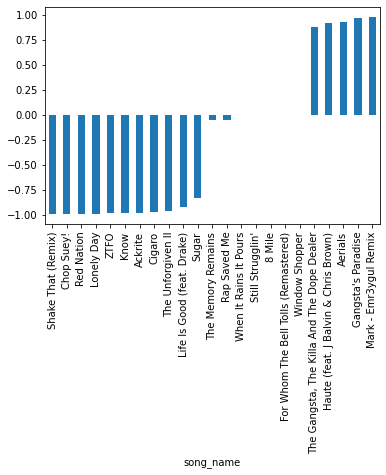

In [23]:
music_sent.plot(kind="bar")